In [ ]:
'''
title: Placement
author: Srikanth
date:May 21,2020
Objective: To read data from placement.csv, preprocess the data and provide insights about the data
'''

# Description of the dataset


The dataset has the employee and other information - across degree percentage, Salary, gender.

# Approach to the data Set

In [ ]:
We will have the following approach to the data set
Step 1. Data Cleaning
Step 2: Data Engineering
Step 3: Visualiztion
Step 4: Conclusion

# Step1. Data Cleaning

In [147]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
placement=pd.read_csv("Placement_Data_Full_Class.csv",index_col='sl_no')

In [10]:
placement.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [15]:
placement.rename(columns={'ssc_p':'SSC%',
                          'ssc_b':'SSC_Board',
                          'hsc_p':'HSC%',
                          'hsc_b':'HSC_Board',
                         'degree_p':'Degree%',
                        'degree_t':'Degree_Tech',
                         'etest_p':'ETest%',
                         'mba_p':'MBA%',
                         'status':'Status',
                         'salary':'Salary',
                         'gender':'Gender',
                        'specialisation':'Specialisation',
                          'hsc_s':'HSC_Group',
                         'workex':'Workex'},inplace=True)

In [25]:
placement.isna().sum().sort_values(ascending=False)

Salary            67
Status             0
MBA%               0
Specialisation     0
ETest%             0
Workex             0
Degree_Tech        0
Degree%            0
HSC_Group          0
HSC_Board          0
HSC%               0
SSC_Board          0
SSC%               0
Gender             0
dtype: int64

In [22]:
na_count=pd.DataFrame({'Sum of NA':placement.isnull().sum()}).sort_values('Sum of NA',ascending=False)

In [23]:
na_count

,Sum of NA
Salary,67
Gender,0
SSC%,0
SSC_Board,0
HSC%,0
HSC_Board,0
HSC_Group,0
Degree%,0
Degree_Tech,0
Workex,0


Null Values are available only for Salary Column

In [29]:
placement['SSC_Board'].unique()

array(['Others', 'Central'], dtype=object)

In [30]:
placement['HSC_Board'].unique()

array(['Others', 'Central'], dtype=object)

In [31]:
placement['HSC_Group'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [32]:
placement['Degree_Tech'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [39]:
placement.loc[placement['Status']=='Not Placed'][['Status','Salary']]

,Status,Salary
sl_no,,
4,Not Placed,NaN
6,Not Placed,NaN
7,Not Placed,NaN
10,Not Placed,NaN
13,Not Placed,NaN
...,...,...
199,Not Placed,NaN
202,Not Placed,NaN
207,Not Placed,NaN


The reason for NaN Values are because people are not placed so may be we can replace NaN with 0's

In [40]:
placement.fillna(0,inplace=True)

In [41]:
placement.isna().sum().sort_values(ascending=False)

Salary            0
Status            0
MBA%              0
Specialisation    0
ETest%            0
Workex            0
Degree_Tech       0
Degree%           0
HSC_Group         0
HSC_Board         0
HSC%              0
SSC_Board         0
SSC%              0
Gender            0
dtype: int64

All NaN Values have been replaced with 0's

In [50]:
placement.dtypes

Gender             object
SSC%              float64
SSC_Board          object
HSC%              float64
HSC_Board          object
HSC_Group          object
Degree%           float64
Degree_Tech        object
Workex             object
ETest%            float64
Specialisation     object
MBA%              float64
Status             object
Salary            float64
dtype: object

# Step 2: Feature Engineering

In [67]:
def salary_group(x):
    if(x==0):
        return 'No Salary'
    if((x<250000.0) & (x>1.0)):
        return 'less than 2.5L'
    if((x>250000.0) & (x<500000.0)):
        return 'BTW 2.5L to 5.0 L'
    if(x>500000.0):
        return 'Greater than 5.0L'

In [68]:
placement['Salary_Group']=placement['Salary'].apply(salary_group)

In [69]:
placement.tail()

,Gender,SSC%,SSC_Board,HSC%,HSC_Board,HSC_Group,Degree%,Degree_Tech,Workex,ETest%,Specialisation,MBA%,Status,Salary,Salary_Group
sl_no,,,,,,,,,,,,,,,
211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0,BTW 2.5L to 5.0 L
212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0,BTW 2.5L to 5.0 L
213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,BTW 2.5L to 5.0 L
214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0,less than 2.5L
215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,0.0,No Salary


# Step 3. Analysis and Visualization

In [83]:
placement['Gender'].value_counts()

M    139
F     76
Name: Gender, dtype: int64

In [153]:
genderplace=placement[['Gender','Status','Salary']].groupby(['Gender','Status']).count()

In [154]:
genderplace

Salary
Gender Status            
F      Not Placed      28
       Placed          48
M      Not Placed      39
       Placed         100

In [155]:
genderplace=genderplace.reset_index()

In [156]:
genderplace

,Gender,Status,Salary
0,F,Not Placed,28
1,F,Placed,48
2,M,Not Placed,39
3,M,Placed,100


In [157]:
genderplace=genderplace.set_index(['Gender','Status']).Salary


In [176]:
genderplace

Gender  Status    
F       Not Placed     28
        Placed         48
M       Not Placed     39
        Placed        100
Name: Salary, dtype: int64

In [177]:
genderplace.unstack()

Status,Not Placed,Placed
Gender,,
F,28,48
M,39,100


####  Key Observation

###### *More Male has been placed than female

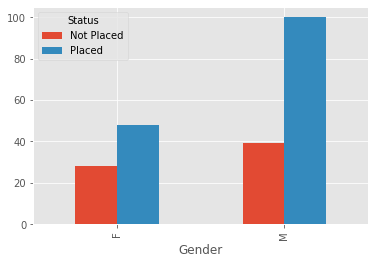

In [166]:
'''plt.style.use('ggplot')'''
genderplace.unstack().plot(kind='bar',stacked=False)
plt.show()

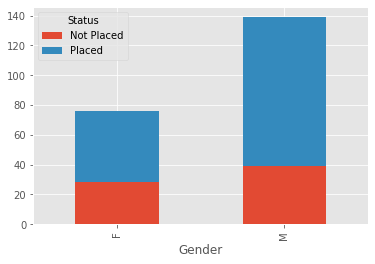

In [167]:
genderplace.unstack().plot(kind='bar',stacked=True)
plt.show()

In [187]:
salaryran=placement.groupby('Salary_Group').count().Salary.sort_values(ascending=False)

In [188]:
salaryran

Salary_Group
BTW 2.5L to 5.0 L    80
No Salary            67
less than 2.5L       44
Greater than 5.0L     3
Name: Salary, dtype: int64

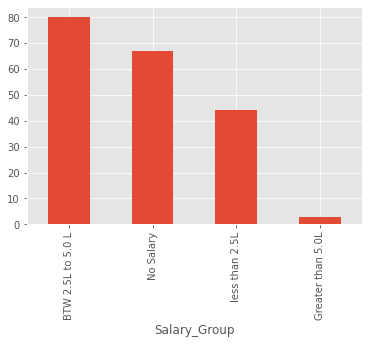

In [189]:
salaryran.plot(kind='bar')

In [217]:
placementstat=placement[['Status','Salary_Group']]

In [218]:
placementstat

,Status,Salary_Group
sl_no,,
1,Placed,BTW 2.5L to 5.0 L
2,Placed,less than 2.5L
3,Placed,None
4,Not Placed,No Salary
5,Placed,BTW 2.5L to 5.0 L
...,...,...
211,Placed,BTW 2.5L to 5.0 L
212,Placed,BTW 2.5L to 5.0 L
213,Placed,BTW 2.5L to 5.0 L


In [219]:
placementstat.groupby('Salary_Group').count()

,Status
Salary_Group,
BTW 2.5L to 5.0 L,80
Greater than 5.0L,3
No Salary,67
less than 2.5L,44


In [221]:
placementstat=placementstat.loc[placement['Status']=='Placed'].groupby('Salary_Group').count().sort_values(by='Status',ascending=False)

In [222]:
placementstat

,Status
Salary_Group,
BTW 2.5L to 5.0 L,80
less than 2.5L,44
Greater than 5.0L,3


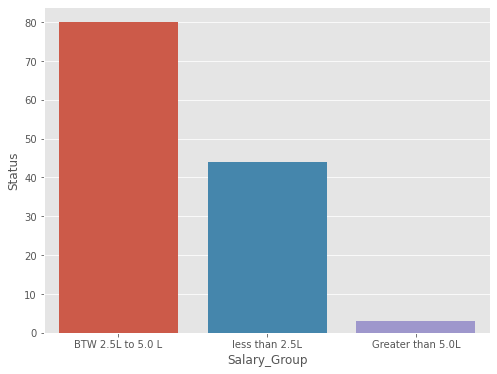

In [223]:
plt.figure(figsize=(8,6))
sns.barplot(data=placementstat,x=placementstat.index,y='Status')
plt.show()